In [1]:
# from tensorboard import notebook
# notebook.list()
# notebook.display(port=6006, height=1000)

No known TensorBoard instances running.


In [4]:
from definitions import *

In [6]:
model_name = 'predator_prey'

args = {
    'model_name': model_name,
    'experiment_name': '{}_recovery_new_prn'.format(model_name),
    'need_retrain': True,
    'learning_rate': 1e-1,
    'epochs_before_decay': 0.1,
    'epochs_count': 20,
    'learning_rate_decay': 1/3,
    'iterations_count': 300,
}

In [7]:
KNOWN_MODEL = 'known model'
UNKNOWN_MODEL = 'unknown model'

In [8]:
import tensorflow as tf

general_params = \
    {
        'phi_h': tf.keras.activations.linear,
        'phi_o': tf.keras.activations.linear,
    }

train_params = \
    {
        'learning_rate': args['learning_rate'],
        'epochs_before_decay': args['epochs_before_decay'],
        'epochs_count': args['epochs_count'],
        'learning_rate_decay': args['learning_rate_decay'],
    }


In [9]:
model_name = args['model_name']
need_train = bool(args['need_retrain'])
mode = UNKNOWN_MODEL

dataset_file_name = 'dataset.csv'
dataset_dir = path_join(DATA_DIR, model_name)
dataset_path = path_join(dataset_dir, dataset_file_name)

experiment_name = args['experiment_name']
experiment_dir = path_join(EXPERIMENTS_DIR, experiment_name)
make_directory(experiment_dir)

tf_model_dir = path_join(experiment_dir, 'tf_model')
make_directory(tf_model_dir)

images_dir = path_join(experiment_dir, 'images')
make_directory(images_dir)

log_path = path_join(experiment_dir, 'log.log')
logging.basicConfig(filename=log_path, level=logging.INFO)

vensim_model_file = path_join(VENSIM_MODELS_DIR, '{}.mdl'.format(model_name))

prn_model_dir = path_join(tf_model_dir, 'prn_model')
nn_model_dir = path_join(tf_model_dir, 'base_nn_model')
make_directory(prn_model_dir)
make_directory(nn_model_dir)

dataset_file = '{}_dataset.csv'.format(model_name)

In [11]:
import pickle

file_name = path_join(prn_model_dir, 'loss_history')
print(file_name)
with open(file_name, 'rb') as file:
    prn_train_data = pickle.load(file)

print(prn_train_data.keys())

# file_name = path_join(nn_model_dir, 'loss_history')
# print(file_name)
# with open(file_name, 'rb') as file:
#     nn_train_data = pickle.load(file)

# print(nn_train_data.keys())

C:\Users\HWer\Documents\GitHub\SDtoPRN\experiments\predator_prey_recovery_new_prn\tf_model\prn_model\loss_history
dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


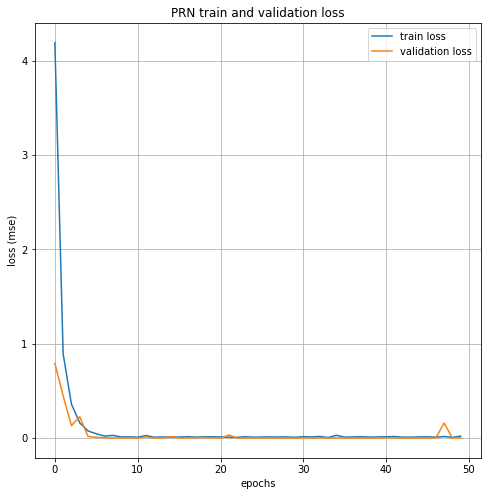

In [19]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 8))
plt.plot(prn_train_data['loss'], label='train loss')
plt.plot(prn_train_data['val_loss'], label='validation loss')

plt.xlabel('epochs')
plt.ylabel('loss (mse)')

# plt.xlim(0)
# plt.ylim(0)
# y_ticks = [10 ** i for i in range(-10, 5)]

title = 'PRN train and validation loss'
plt.title(title)

# plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_dir, title))

In [18]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 8))
plt.plot(nn_train_data['loss'], label='train loss')
plt.plot(nn_train_data['val_loss'], label='validation loss')

plt.xlabel('epochs')
plt.ylabel('loss (mse)')

# plt.xlim(0)
# plt.ylim(0)
# y_ticks = [10 ** i for i in range(-10, 5)]

title = 'NN train and validation loss'
plt.title(title)

# plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_dir, title))

NameError: name 'nn_train_data' is not defined

<Figure size 576x576 with 0 Axes>

NameError: name 'nn_train_data' is not defined

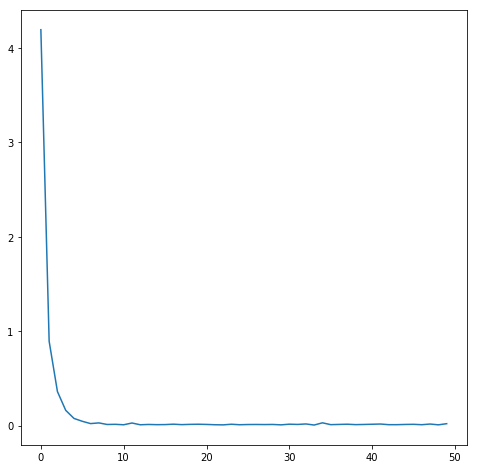

In [20]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 8))
plt.plot(prn_train_data['loss'], label='PRN loss')
plt.plot(nn_train_data['loss'], label='NN loss')

plt.xlabel('epochs')
plt.ylabel('loss (mse)')

# plt.xlim(0)
# plt.ylim(0)
# y_ticks = [10 ** i for i in range(-10, 5)]

title = 'PRN and NN train loss'
plt.title(title)

plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_dir, title))

In [ ]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 8))
plt.plot(prn_train_data['val_loss'], label='PRN loss')
plt.plot(nn_train_data['val_loss'], label='NN loss')

plt.xlabel('epochs')
plt.ylabel('loss (mse)')

# plt.xlim(0)
# plt.ylim(0)
# y_ticks = [10 ** i for i in range(-10, 5)]

title = 'PRN and NN validation loss'
plt.title(title)

plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_dir, title))